In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

In [3]:
DataPath="../../../../../../../data/jlj/outputs/BackwardTracing/"

In [4]:
def import_data(DataDictionary,DataPath,Filename,Keyname) :
    # Make dict
    DataDictionary[Keyname]={}
    
    DataDictionary[Keyname]["Infected"]=pd.read_csv(DataPath+"Infected/"+Filename,header=None)

    DataDictionary[Keyname]["TraceIsolated"]=pd.read_csv(DataPath+"TraceIsolated/"+Filename,header=None)
    DataDictionary[Keyname]["TestIsolated"]=pd.read_csv(DataPath+"TestIsolated/"+Filename,header=None)
    DataDictionary[Keyname]["Isolated"]=np.array(DataDictionary[Keyname]["TraceIsolated"])+np.array(DataDictionary[Keyname]["TestIsolated"])

    return DataDictionary
    

In [5]:
class MitigationData() :
    def __init__(self,DataPath,Filename,length=-1) :
        self.infected=np.array(pd.read_csv(DataPath+"Infected/"+Filename,header=None)[0][0:length])
        self.traceisolated = np.array(pd.read_csv(DataPath+"TraceIsolated/"+Filename,header=None)[0][0:length])
        self.testisolated=np.array(pd.read_csv(DataPath+"TestIsolated/"+Filename,header=None)[0][0:length])
        self.isolated = self.traceisolated+self.testisolated
                                                     
                                                     

In [19]:
class MitigationEvaluation() :
    def __init__(self,NoMitigation) :
        self.baseinfected=NoMitigation.infected
        self.tracestrategies = dict()
        
    def add_mitigation_effort(self,MitigationData,childfactor=0.5,releasetime=10000,testing=True,tracing=False,releasing=False) :
        
        if (testing==True and tracing==False and releasing==False) :
            self.testefficiency= (self.baseinfected-MitigationData.infected)/np.maximum(np.ones(len(MitigationData.isolated)),MitigationData.isolated)
        elif (testing==True and tracing==True and releasing==False) :
            #print("YES")
            self.tracestrategies["%.2f child"%childfactor]=(self.baseinfected-MitigationData.infected)/np.maximum(np.ones(len(MitigationData.isolated)),MitigationData.isolated)
        elif (testing==True and tracing==True and releasing==True) :
            self.tracestrategies["%.2f child and release after %i"%(childfactor,releasetime)]=(self.baseinfected-MitigationData.infected)/np.maximum(np.ones(len(MitigationData.isolated)),MitigationData.isolated)
            
        else :
            print("No test and no trace. Did you mean to add baseinfection?")
            pass
        

## Flat infectiousness profile

In [20]:

### Flat, No test or trace

# Define file and key
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatNoTestNoTrace=MitigationData(DataPath,ImportFile)

### Flat, Test no trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestNoTrace=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestTrace=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
FlatTestTraceOnlyChildren=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:1.0_ChildFactor:0.0.txt"
FlatTestTraceOnlyParents=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, test,trace then release
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestTraceRelease=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

In [21]:
# Get base infections
FlatEvaluation = MitigationEvaluation(FlatNoTestNoTrace)
FlatEvaluation.add_mitigation_effort(FlatTestNoTrace,testing=True)
FlatEvaluation.add_mitigation_effort(FlatTestTrace,childfactor=0.5,testing=True,tracing=True)
FlatEvaluation.add_mitigation_effort(FlatTestTraceOnlyChildren,childfactor=1.0,testing=True,tracing=True)
FlatEvaluation.add_mitigation_effort(FlatTestTraceOnlyParents,childfactor=0.0,testing=True,tracing=True)

FlatEvaluation.add_mitigation_effort(FlatTestTraceRelease,childfactor=0.5,releasetime=4,testing=True,tracing=True,releasing=True)




In [22]:
FlatTestTraceRelease.infected

array([96536, 94740, 95337, 96224, 95319, 95699, 96047, 96504, 95644,
       95657, 95969, 95180, 96969, 95894, 94530, 96100, 95765, 94532,
       95421, 95510, 95002, 94671, 94771, 95458, 95438, 94566, 94405,
       95606, 95820, 95597, 95428, 95197, 96662, 95642, 94951, 95861,
       95567, 96163, 95143, 96167, 95306, 95755, 95000, 95516, 94712,
       95537, 95100, 95693, 93906, 95147, 96558, 94682, 95569, 95067,
       95848, 94178, 94632, 94413, 95655, 95069, 94597, 94530, 95605,
       95340, 94841, 94691, 95827, 96251, 95407, 95571, 95121, 96222,
       95812, 94425, 95784, 95609, 94352, 93964, 95063, 95809, 95617,
       96215, 94845, 95842, 95375, 95660, 94801, 95232, 96002, 95850,
       95589, 96417, 95659, 96059, 95939, 95463, 95656, 96501, 96050,
       95968, 95638, 96313, 95099, 95233, 95595, 94671, 95691, 95061,
       93970, 95029, 95659, 95439, 95416, 95001, 96058, 95195, 95154,
       95605, 95722, 95757, 95605, 95835, 95288, 96116, 95766, 96494,
       96540, 95626,

In [23]:
print(len(FlatNoTestNoTrace.infected))

999


<ipython-input-24-5e0806b9329a>:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


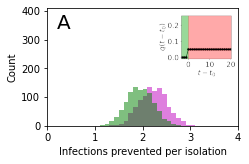

-----------
Mean effectiveness +/ error on mean:
Forward Contact Tracing:	 94304.53 +/- 22.16 infected in total
Backward Contact Tracing:	 93454.41 +/- 23.91 infected in total


In [24]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,4)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="A"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Backward":{},
            "Forward":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Backward"]["color"]="m"
PlotDetails["Forward"]["color"]="g"
PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["Backward"]["label"]="Backward"
PlotDetails["Forward"]["label"]="Forward"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])

# Backward..
plt.hist(FlatEvaluation.tracestrategies["0.00 child"],
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Backward"]["color"],
         label=PlotDetails["Backward"]["label"])

# Forward..
plt.hist(FlatEvaluation.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Forward"]["color"],
         label=PlotDetails["Forward"]["label"])


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



plt.text(
         FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
         FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
         FigureSettings["figurelabel"]["text"],     
         ha='left',
         va="top",
         fontsize=FigureSettings["figurelabel"]["fontsize"]
        )

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_flat.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/flat.png",dpi=400)
plt.savefig("figures/flat.pdf")

plt.show()


print("-----------")
print("Mean effectiveness +/ error on mean:")
print("Forward Contact Tracing:\t %.2f +/- %.2f infected in total"%(np.mean(FlatTestTraceOnlyChildren.infected),np.std(FlatTestTraceOnlyChildren.infected)/np.sqrt(len(FlatTestTraceOnlyChildren.infected))))
print("Backward Contact Tracing:\t %.2f +/- %.2f infected in total"%(np.mean(FlatTestTraceOnlyParents.infected),np.std(FlatTestTraceOnlyParents.infected)/np.sqrt(len(FlatTestTraceOnlyParents.infected))))




In [14]:
print("Only children",np.mean(FlatTestTraceOnlyChildren.infected))
print("Only parents",np.mean(FlatTestTraceOnlyParents.infected))


Only children 94304.52752752753
Only parents 93454.41341341341


## Empirical Infectiousness Profile

In [25]:

### Flat, No test or trace


### Empirical, Test no trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
#"Network:BA_Kojaku_InfectiousProfile:empirical_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
EmpiricalTestNoTrace=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Empirical, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
EmpiricalTestTrace=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Empirical, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
EmpiricalTestTraceOnlyChildren=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Empirical, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:1.0_ChildFactor:0.0.txt"
EmpiricalTestTraceOnlyParents=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Empirical, test,trace then release
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
EmpiricalTestTraceRelease=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

In [26]:
# Get base infections
EmpiricalEvaluation = MitigationEvaluation(FlatNoTestNoTrace)
EmpiricalEvaluation.add_mitigation_effort(EmpiricalTestNoTrace,testing=True)
EmpiricalEvaluation.add_mitigation_effort(EmpiricalTestTrace,childfactor=0.5,testing=True,tracing=True)
EmpiricalEvaluation.add_mitigation_effort(EmpiricalTestTraceOnlyChildren,childfactor=1.0,testing=True,tracing=True)
EmpiricalEvaluation.add_mitigation_effort(EmpiricalTestTraceOnlyParents,childfactor=0.0,testing=True,tracing=True)

EmpiricalEvaluation.add_mitigation_effort(EmpiricalTestTraceRelease,childfactor=0.5,releasetime=4,testing=True,tracing=True,releasing=True)


<ipython-input-27-9453df9c8ee2>:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


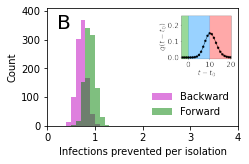

-----------
Mean effectiveness +/ error on mean:
Forward Contact Tracing:	 92850.69 +/- 23.29 infected in total
Backward Contact Tracing:	 94356.72 +/- 21.57 infected in total


In [27]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,4)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="B"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Backward":{},
            "Forward":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Backward"]["color"]="m"
PlotDetails["Forward"]["color"]="g"
PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["Backward"]["label"]="Backward"
PlotDetails["Forward"]["label"]="Forward"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
plt.hist(EmpiricalEvaluation.tracestrategies["0.00 child"],
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Backward"]["color"],
         label=PlotDetails["Backward"]["label"])

# Forward..
plt.hist(EmpiricalEvaluation.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Forward"]["color"],
         label=PlotDetails["Forward"]["label"])


# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])

plt.legend(loc=4,frameon=False,fontsize=FigureSettings["legend"]["fontsize"])

plt.text(
         FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
         FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
         FigureSettings["figurelabel"]["text"],     
         ha='left',
         va="top",
         fontsize=FigureSettings["figurelabel"]["fontsize"]
        )

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_skewed_empirical.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/empirical.png",dpi=400)
plt.savefig("figures/empirical.pdf")

plt.show()


print("-----------")
print("Mean effectiveness +/ error on mean:")
print("Forward Contact Tracing:\t %.2f +/- %.2f infected in total"%(np.mean(EmpiricalTestTraceOnlyChildren.infected),np.std(EmpiricalTestTraceOnlyChildren.infected)/np.sqrt(len(EmpiricalTestTraceOnlyChildren.infected))))
print("Backward Contact Tracing:\t %.2f +/- %.2f infected in total"%(np.mean(EmpiricalTestTraceOnlyParents.infected),np.std(EmpiricalTestTraceOnlyParents.infected)/np.sqrt(len(EmpiricalTestTraceOnlyParents.infected))))


In [18]:
print("Only children",np.mean(EmpiricalTestTraceOnlyChildren.infected))
print("Only parents",np.mean(EmpiricalTestTraceOnlyParents.infected))

Only children 92850.6886886887
Only parents 94356.71971971972


### Trace with release vs. test only

<ipython-input-332-88923c3250fc>:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


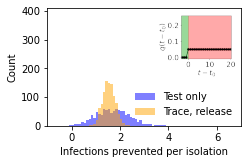

-----------
Mean efficiency +/ error on mean:
Test only:	 1.72 +/- 0.02 prevented per isolation
Trace and release:	 1.54 +/- 0.01 prevented per isolation


In [332]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(-1,7)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]=""
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Test":{},
            "Release":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Test"]["color"]="b"
PlotDetails["Release"]["color"]="orange"

# Bin labels
PlotDetails["Test"]["label"]="Test only"
PlotDetails["Release"]["label"]="Trace, release"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
plt.hist(FlatEvaluation.testefficiency,
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Test"]["color"],
         label=PlotDetails["Test"]["label"])

# Forward..
plt.hist(FlatEvaluation.tracestrategies["0.50 child and release after 4"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Release"]["color"],
         label=PlotDetails["Release"]["label"])

#plt.axvline(FlatEvaluation.testefficiency.mean(), color=PlotDetails["Test"]["color"], linestyle='dashed', linewidth=1,alpha=AlphaChoice)
#plt.axvline(FlatEvaluation.tracestrategies["0.50 child and release after 4"].mean(), color=PlotDetails["Release"]["color"], linestyle='dashed', linewidth=1, alpha=AlphaChoice)

# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])

plt.legend(loc=4,frameon=False,fontsize=FigureSettings["legend"]["fontsize"])

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_flat.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/test_vs_tracerelease.png",dpi=400)
plt.savefig("figures/test_vs_tracerelease.pdf")

plt.show()

print("-----------")
print("Mean efficiency +/ error on mean:")
print("Test only:\t %.2f +/- %.2f prevented per isolation"%(np.mean(FlatEvaluation.testefficiency),np.std(FlatEvaluation.testefficiency)/np.sqrt(len(FlatEvaluation.testefficiency))))
print("Trace and release:\t %.2f +/- %.2f prevented per isolation"%(np.mean(FlatEvaluation.tracestrategies["0.50 child and release after 4"]),np.std(FlatEvaluation.tracestrategies["0.50 child and release after 4"])/np.sqrt(len(FlatEvaluation.tracestrategies["0.50 child and release after 4"]))))



In [19]:
np.mean(FlatEvaluation.tracestrategies["0.50 child and release after 4"])

1.5381161012298568

In [20]:
np.mean(FlatEvaluation.testefficiency)

1.7187498977703803

## Exponential waiting time (empirical and flat)

In [83]:

### Flat, No test or trace

# Define file and key
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatNoTestNoTraceExponential=MitigationData(DataPath,ImportFile)

### Flat, Test no trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestNoTraceExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestTraceExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
FlatTestTraceOnlyChildrenExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:1.0_ChildFactor:0.0.txt"
FlatTestTraceOnlyParentsExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, test,trace then release
ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
FlatTestTraceReleaseExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


In [84]:
# Get base infections
FlatEvaluationExponential = MitigationEvaluation(FlatNoTestNoTraceExponential)
FlatEvaluationExponential.add_mitigation_effort(FlatTestNoTraceExponential,testing=True)
FlatEvaluationExponential.add_mitigation_effort(FlatTestTraceExponential,childfactor=0.5,testing=True,tracing=True)
FlatEvaluationExponential.add_mitigation_effort(FlatTestTraceOnlyChildrenExponential,childfactor=1.0,testing=True,tracing=True)
FlatEvaluationExponential.add_mitigation_effort(FlatTestTraceOnlyParentsExponential,childfactor=0.0,testing=True,tracing=True)

FlatEvaluationExponential.add_mitigation_effort(FlatTestTraceReleaseExponential,childfactor=0.5,releasetime=4,testing=True,tracing=True,releasing=True)




<ipython-input-85-317fb1b6ce50>:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


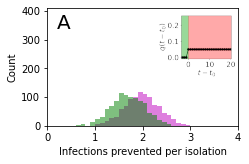

In [85]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,4)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="A"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Backward":{},
            "Forward":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Backward"]["color"]="m"
PlotDetails["Forward"]["color"]="g"
PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["Backward"]["label"]="Backward"
PlotDetails["Forward"]["label"]="Forward"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
plt.hist(FlatEvaluationExponential.tracestrategies["0.00 child"],
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Backward"]["color"],
         label=PlotDetails["Backward"]["label"])

# Forward..
plt.hist(FlatEvaluationExponential.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Forward"]["color"],
         label=PlotDetails["Forward"]["label"])


# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



plt.text(
         FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
         FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
         FigureSettings["figurelabel"]["text"],     
         ha='left',
         va="top",
         fontsize=FigureSettings["figurelabel"]["fontsize"]
        )

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_flat.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/flat_exponential.png",dpi=400)
plt.savefig("figures/flat_exponential.pdf")

plt.show()

In [39]:

### Flat, No test or trace

# Define file and key
#ImportFile="Network:BA_Kojaku_InfectiousProfile:Empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
#EmpiricalNoTestNoTraceExponential=MitigationData(DataPath,ImportFile)

### Flat, Test no trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
EmpiricalNoTestNoTraceExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, Test and trace
#ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
#EmpiricalTestTraceExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
EmpiricalTestTraceOnlyChildrenExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:1.0_ChildFactor:0.0.txt"
EmpiricalTestTraceOnlyParentsExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


### Flat, test,trace then release
#ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_InfectiousWaitExponential:true_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.5_ChildFactor:0.5.txt"
#EmpiricalTestTraceReleaseExponential=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


In [40]:
# Get base infections
EmpiricalEvaluationExponential = MitigationEvaluation(EmpiricalNoTestNoTraceExponential)
#EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestNoTraceExponential,testing=True)
#EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestTraceExponential,childfactor=0.5,testing=True,tracing=True)
EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestTraceOnlyChildrenExponential,childfactor=1.0,testing=True,tracing=True)
EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestTraceOnlyParentsExponential,childfactor=0.0,testing=True,tracing=True)

#EmpiricalEvaluationExponential.add_mitigation_effort(FlatTestTraceReleaseExponential,childfactor=0.5,releasetime=4,testing=True,tracing=True,releasing=True)




<ipython-input-47-a8ece13f734f>:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


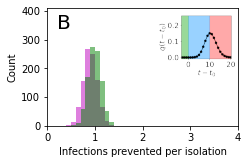

-----------
Mean efficiency +/ error on mean:
Backward only:	 0.90 +/- 0.00 prevented per isolation
Forward only:	 1.00 +/- 0.00 prevented per isolation


In [47]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,4)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="B"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Backward":{},
            "Forward":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Backward"]["color"]="m"
PlotDetails["Forward"]["color"]="g"
PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["Backward"]["label"]="Backward"
PlotDetails["Forward"]["label"]="Forward"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
plt.hist(EmpiricalEvaluationExponential.tracestrategies["0.00 child"],
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Backward"]["color"],
         label=PlotDetails["Backward"]["label"])

# Forward..
plt.hist(EmpiricalEvaluationExponential.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Forward"]["color"],
         label=PlotDetails["Forward"]["label"])


# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



plt.text(
         FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
         FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
         FigureSettings["figurelabel"]["text"],     
         ha='left',
         va="top",
         fontsize=FigureSettings["figurelabel"]["fontsize"]
        )

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_skewed_empirical.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/empirical_exponential.png",dpi=400)
plt.savefig("figures/empirical_exponential.pdf")

plt.show()



print("-----------")
print("Mean efficiency +/ error on mean:")
print("Backward only:\t %.2f +/- %.2f prevented per isolation"%(np.mean(EmpiricalEvaluationExponential.tracestrategies["0.00 child"]),np.std(EmpiricalEvaluationExponential.tracestrategies["0.00 child"])/np.sqrt(len(EmpiricalEvaluationExponential.tracestrategies["0.00 child"]))))
print("Forward only:\t %.2f +/- %.2f prevented per isolation"%(np.mean(EmpiricalEvaluationExponential.tracestrategies["1.00 child"]),np.std(EmpiricalEvaluationExponential.tracestrategies["1.00 child"])/np.sqrt(len(EmpiricalEvaluationExponential.tracestrategies["1.00 child"]))))



## No E compartment (empirical)


In [49]:

### Flat, No test or trace

# Define file and key
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_IncudeExposedCompartmentfalse_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.5_ChildFactor:0.5.txt"
EmpiricalNoTestNoTraceNoE=MitigationData(DataPath,ImportFile)

### Flat, Test no trace


### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_IncudeExposedCompartmentfalse_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
EmpiricalTestTraceOnlyChildrenNoE=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))

### Flat, Test and trace
ImportFile="Network:BA_Kojaku_InfectiousProfile:empirical_IncudeExposedCompartmentfalse_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:halfway_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:1.0_ChildFactor:0.0.txt"
EmpiricalTestTraceOnlyParentsNoE=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))


In [50]:
# Get base infections
EmpiricalEvaluationNoE = MitigationEvaluation(EmpiricalNoTestNoTraceNoE)
#EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestNoTraceExponential,testing=True)
#EmpiricalEvaluationExponential.add_mitigation_effort(EmpiricalTestTraceExponential,childfactor=0.5,testing=True,tracing=True)
EmpiricalEvaluationNoE.add_mitigation_effort(EmpiricalTestTraceOnlyChildrenNoE,childfactor=1.0,testing=True,tracing=True)
EmpiricalEvaluationNoE.add_mitigation_effort(EmpiricalTestTraceOnlyParentsNoE,childfactor=0.0,testing=True,tracing=True)

#EmpiricalEvaluationExponential.add_mitigation_effort(FlatTestTraceReleaseExponential,childfactor=0.5,releasetime=4,testing=True,tracing=True,releasing=True)




<ipython-input-51-8db08670258c>:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


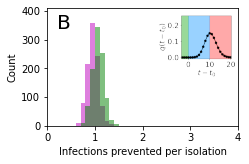

-----------
Mean efficiency +/ error on mean:
Backward only:	 0.95 +/- 0.00 prevented per isolation
Forward only:	 1.07 +/- 0.00 prevented per isolation


In [51]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,4)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="B"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Backward":{},
            "Forward":{},
            "Both":{}}

# Plotcolor:
PlotDetails["Backward"]["color"]="m"
PlotDetails["Forward"]["color"]="g"
PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["Backward"]["label"]="Backward"
PlotDetails["Forward"]["label"]="Forward"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
plt.hist(EmpiricalEvaluationNoE.tracestrategies["0.00 child"],
         bins=BinBoundaries,#=NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Backward"]["color"],
         label=PlotDetails["Backward"]["label"])

# Forward..
plt.hist(EmpiricalEvaluationNoE.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Forward"]["color"],
         label=PlotDetails["Forward"]["label"])


# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



plt.text(
         FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
         FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
         FigureSettings["figurelabel"]["text"],     
         ha='left',
         va="top",
         fontsize=FigureSettings["figurelabel"]["fontsize"]
        )

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_skewed_empirical.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')
plt.tight_layout()
plt.savefig("figures/empirical_NoExposedCompartment.png",dpi=400)
plt.savefig("figures/empirical_NoExposedCompartment.pdf")

plt.show()



print("-----------")
print("Mean efficiency +/ error on mean:")
print("Backward only:\t %.2f +/- %.2f prevented per isolation"%(np.mean(EmpiricalEvaluationNoE.tracestrategies["0.00 child"]),np.std(EmpiricalEvaluationNoE.tracestrategies["0.00 child"])/np.sqrt(len(EmpiricalEvaluationNoE.tracestrategies["0.00 child"]))))
print("Forward only:\t %.2f +/- %.2f prevented per isolation"%(np.mean(EmpiricalEvaluationNoE.tracestrategies["1.00 child"]),np.std(EmpiricalEvaluationNoE.tracestrategies["1.00 child"])/np.sqrt(len(EmpiricalEvaluationNoE.tracestrategies["1.00 child"]))))



### Varying children factor

In [149]:
ChildFactorScan = {}


In [170]:
# Additional for Flat.
ChildFactorScan["BA"]={"mean":[],"error on mean":[],"child factor":[]}

for ChildrenFactor in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] :
    ### Flat, Test and trace
    ImportFile="Network:BA_Kojaku_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:%.1f_ChildFactor:%.1f.txt"%(1-ChildrenFactor,ChildrenFactor)
    FlatTestTraceVaryingChildrenFactor=MitigationData(DataPath,ImportFile,length=len(FlatNoTestNoTrace.infected))
    
    FlatEvaluation.add_mitigation_effort(FlatTestTraceVaryingChildrenFactor,childfactor=ChildrenFactor,testing=True,tracing=True)
    
    
    ChildFactorScan["BA"]["mean"].append(np.mean(FlatEvaluation.tracestrategies["%.2f child"%ChildrenFactor]))
    ChildFactorScan["BA"]["error on mean"].append(np.std(FlatEvaluation.tracestrategies["%.2f child"%ChildrenFactor])/np.sqrt(len(EREvaluation.tracestrategies["%.2f child"%ChildrenFactor]))) # Change this
    ChildFactorScan["BA"]["child factor"].append(ChildrenFactor)    


In [164]:
# ER data.
# ------

ChildFactorScan["ER"]={"mean":[],"error on mean":[],"child factor":[]}



### Flat, No test or trace

# Define file and key
ImportFile="Network:ER_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:4_SeedNumber:250_Ps:0.0_Pt:0.0_ParentFactor:0.0_ChildFactor:1.0.txt"
ERNoTestNoTrace=MitigationData(DataPath,ImportFile)

EREvaluation = MitigationEvaluation(ERNoTestNoTrace)


for ChildrenFactor in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] :
    ### Flat, Test and trace
    ImportFile="Network:ER_InfectiousProfile:Flat_InfectiousWaitExponential:false_AverageR0:1.0_SymptomOnsetTime:immediately_TraceReleaseTime:4_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:%.1f_ChildFactor:%.1f.txt"%(1-ChildrenFactor,ChildrenFactor)
    #"Network:BA_Kojaku_InfectiousProfile:Flat_SymptomOnsetTime:immediately_TraceReleaseTime:10000_SeedNumber:250_Ps:0.05_Pt:0.5_ParentFactor:0.0_ChildFactor:1.0.txt"
    ERTestTraceVaryingChildrenFactor=MitigationData(DataPath,ImportFile,length=len(ERNoTestNoTrace.infected))
    
    EREvaluation.add_mitigation_effort(ERTestTraceVaryingChildrenFactor,childfactor=ChildrenFactor,testing=True,tracing=True)
    
    ChildFactorScan["ER"]["mean"].append(np.mean(EREvaluation.tracestrategies["%.2f child"%ChildrenFactor]))
    ChildFactorScan["ER"]["error on mean"].append(np.std(EREvaluation.tracestrategies["%.2f child"%ChildrenFactor])/np.sqrt(len(EREvaluation.tracestrategies["%.2f child"%ChildrenFactor]))) # Change this
    ChildFactorScan["ER"]["child factor"].append(ChildrenFactor)


In [174]:
import matplotlib as mpl


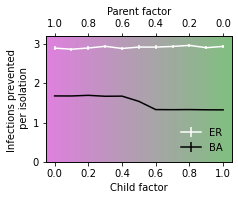

In [336]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.8)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(-.05,1.05)
FigureSettings["axis limits"]["y"]=(0,3.2)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x1"]="Child factor"
FigureSettings["labels"]["x2"]="Parent factor"

FigureSettings["labels"]["y"]="Infections prevented \n per isolation"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="A"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"BA":{},
            "ER":{}}

# Plotcolor:
PlotDetails["BA"]["color"]="k"
PlotDetails["ER"]["color"]="w"
#PlotDetails["Both"]["color"]="c"

# Bin labels
PlotDetails["BA"]["label"]="BA"
PlotDetails["ER"]["label"]="ER"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.10)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])
# Backward..
# plt.hist(FlatEvaluation.tracestrategies["0.00 child"],
#          bins=BinBoundaries,#=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Backward"]["color"],
#          label=PlotDetails["Backward"]["label"])

# # Forward..
# plt.hist(FlatEvaluation.tracestrategies["1.00 child"],
#          bins=BinBoundaries,#NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Forward"]["color"],
#          label=PlotDetails["Forward"]["label"])

ax1=fig.add_subplot(111)

# cmap = mpl.cm.jet
# norm = mpl.colors.Normalize(vmin=-40, vmax=180)
# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 orientation='vertical',                                
#                                 norm=norm,
#                                 ticks=[-40,180]
#                                 )

#norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.

cmap = mpl.colors.LinearSegmentedColormap.from_list('custom mtog', ['m','g'], N=512)

x = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],0.01)
yarr = np.vstack((x,))
#yarr=np.vstack((yarr,yarr))
#y = x
# plt.imshow(yarr, extent=(FigureSettings["axis limits"]["x"][0],
#                          FigureSettings["axis limits"]["x"][1],
#                          FigureSettings["axis limits"]["y"][0],
#                          FigureSettings["axis limits"]["y"][1]/2), 
#                          cmap=cmap,
#                          alpha=AlphaChoice)

plt.imshow(yarr, extent=(FigureSettings["axis limits"]["x"][0],
                         FigureSettings["axis limits"]["x"][1],
                         FigureSettings["axis limits"]["y"][0],
                         FigureSettings["axis limits"]["y"][1]), 
                         cmap=cmap,
                         alpha=AlphaChoice,
                        interpolation='nearest', aspect='auto')


# ER
plt.errorbar(x=ChildFactorScan["ER"]["child factor"],
         y=ChildFactorScan["ER"]["mean"],
         yerr = ChildFactorScan["ER"]["error on mean"],
         #bins=BinBoundaries,#=NumberOfBins,
         alpha=1,#AlphaChoice,
         color=PlotDetails["ER"]["color"],
         label=PlotDetails["ER"]["label"])

plt.errorbar(x=ChildFactorScan["BA"]["child factor"],
         y=ChildFactorScan["BA"]["mean"],
         yerr=ChildFactorScan["BA"]["error on mean"],
         #bins=BinBoundaries,#=NumberOfBins,
         alpha=1,#AlphaChoice,
         color=PlotDetails["BA"]["color"],
         label=PlotDetails["BA"]["label"])


ax2 = ax1.twiny()

# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


ax1.set_xlabel(FigureSettings["labels"]["x1"])
ax2.set_xlabel(FigureSettings["labels"]["x2"])
#xticks=ax1.get_xticks()
ax2.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax2.set_xticklabels(['1.0','0.8','0.6','0.4','0.2','0.0'])#xticks[::-1])

#ax2.set_xticklabels({"1.0", "0.8" ,"0.6","0.4","0.2","0.0"})

ax1.set_ylabel(FigureSettings["labels"]["y"])

plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



# plt.text(
#          FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
#          FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
#          FigureSettings["figurelabel"]["text"],     
#          ha='left',
#          va="top",
#          fontsize=FigureSettings["figurelabel"]["fontsize"]
#         )

# Insert image..
#newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
#image_to_insert = plt.imread('figures/q_flat.png') # insert local path of the image.
#newax.imshow(image_to_insert)
#newax.axis('off')

ax1.legend(loc=4,frameon=False,fontsize=FigureSettings["legend"]["fontsize"])




plt.tight_layout()
plt.savefig("figures/child_vs_parent.png",dpi=400)
plt.savefig("figures/child_vs_parent.pdf")

plt.show()

### Kojaku method


In [339]:
import pickle

In [340]:
# Import data
PathToOutputs = "outputs/"
with open(PathToOutputs+'KojakuEfficiencyEstimates.pickle', 'rb') as handle:
    KojakuEfficiencyEstimates = pickle.load(handle)

<ipython-input-357-6df4794de945>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


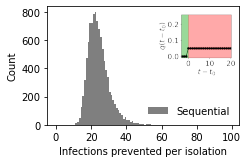

-----------
Mean efficiency +/ error on mean:
Kojaku's sequential estimate:	 24.14 +/- 0.06 prevented per isolation


In [357]:


# Figure settings
# -------

FigureSettings = {}

# Figure size
FigureSettings["figsize"]=(3.55,3.6*0.66)

# axislimits
FigureSettings["axis limits"]={}
FigureSettings["axis limits"]["x"]=(0,100)
FigureSettings["axis limits"]["y"]=(0,410)
#FigureSettings["axis limits"]["y"]=



# Labels
FigureSettings["labels"]={}
FigureSettings["labels"]["x"]="Infections prevented per isolation"
FigureSettings["labels"]["y"]="Count"

# Numbering
FigureSettings["figurelabel"]=dict()
FigureSettings["figurelabel"]["text"]="A"
FigureSettings["figurelabel"]["fontsize"]=20

# legend
FigureSettings["legend"]=dict()
FigureSettings["legend"]["fontsize"]=10

# Plot settings
# -------

PlotDetails={"Kojaku":{},}

# Plotcolor:
PlotDetails["Kojaku"]["color"]="k"


# Bin labels
PlotDetails["Kojaku"]["label"]=r"Sequential"


# Histogram
#NumberOfBins=15
BinBoundaries = np.arange(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1],1.0)
AlphaChoice=0.5




# Make the Figure
fig=plt.figure(figsize=FigureSettings["figsize"])


# Kojaku..
plt.hist(KojakuEfficiencyEstimates,#FlatEvaluationExponential.tracestrategies["1.00 child"],
         bins=BinBoundaries,#NumberOfBins,
         alpha=AlphaChoice,
         facecolor=PlotDetails["Kojaku"]["color"],
         label=PlotDetails["Kojaku"]["label"])


# Both
# plt.hist((np.array(Data["Flat, no test and no trace"]["Infected"][0])-np.array(Data["Flat, test and trace, backward and forward tracing"]["Infected"][0]))/np.array(Data["Flat, test and trace, backward and forward tracing"]["Isolated"][0]),
#          bins=NumberOfBins,
#          alpha=AlphaChoice,
#          facecolor=PlotDetails["Both"]["color"]
#         )


plt.xlabel(FigureSettings["labels"]["x"])
plt.ylabel(FigureSettings["labels"]["y"])

#plt.xlim(FigureSettings["axis limits"]["x"][0],FigureSettings["axis limits"]["x"][1])
#plt.ylim(FigureSettings["axis limits"]["y"][0],FigureSettings["axis limits"]["y"][1])



# plt.text(
#          FigureSettings["axis limits"]["x"][0]+0.05*(FigureSettings["axis limits"]["x"][1]-FigureSettings["axis limits"]["x"][0]),
#          FigureSettings["axis limits"]["y"][1]-0.05*(FigureSettings["axis limits"]["y"][1]-FigureSettings["axis limits"]["y"][0]),
#          FigureSettings["figurelabel"]["text"],     
#          ha='left',
#          va="top",
#          fontsize=FigureSettings["figurelabel"]["fontsize"]
#         )

plt.legend(loc=4,frameon=False,fontsize=FigureSettings["legend"]["fontsize"])

# Insert image..
newax = fig.add_axes([0.60,0.48,0.45,0.45], anchor='SW', zorder=1)
image_to_insert = plt.imread('figures/q_flat.png') # insert local path of the image.
newax.imshow(image_to_insert)
newax.axis('off')


plt.tight_layout()
plt.savefig("figures/Kojaku_estimate.png",dpi=400)
plt.savefig("figures/Kojaku_estimate.pdf")

plt.show()



print("-----------")
print("Mean efficiency +/ error on mean:")
print("Kojaku's sequential estimate:\t %.2f +/- %.2f prevented per isolation"%(np.mean(KojakuEfficiencyEstimates),np.std(KojakuEfficiencyEstimates)/np.sqrt(len(KojakuEfficiencyEstimates))))


In [344]:
KojakuEfficiencyEstimates

[26.41304347826087,
 23.218945487042003,
 23.49448191293685,
 16.7824298160697,
 25.262284620293556,
 20.308297180043382,
 24.06858202038925,
 24.221020092735703,
 29.70977011494253,
 24.12860241710567,
 19.409994767137626,
 17.298027757487215,
 18.770795776461497,
 22.080321285140563,
 19.85209003215434,
 24.668515095502155,
 26.437619350732017,
 30.419529837251357,
 23.520783847980997,
 22.47179635522129,
 26.81237721021611,
 26.870388507998694,
 24.22208663819402,
 23.158883994126285,
 24.54492127199753,
 26.890073284477015,
 26.54112694300518,
 26.593320235756384,
 28.354982817869416,
 22.322118197776476,
 23.800361336946704,
 14.719531077195311,
 16.55253012048193,
 20.69710224166211,
 24.96213054187192,
 15.849008759797142,
 21.030362665167274,
 16.506072874493928,
 16.194805194805195,
 26.967337512372154,
 28.339427388754743,
 34.80175159235669,
 26.890717577353524,
 18.199794555726758,
 25.3007874015748,
 32.05009416195857,
 27.163224516988674,
 36.27060782681099,
 30.557776162